## Demonstration of two-layer feedforward spiking network

Include sparsity parameter-- nInput

Starting parallel pool (parpool) using the 'local' profile ...
connected to 4 workers.


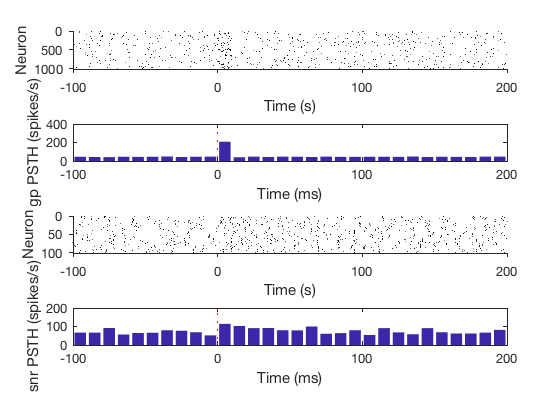

In [7]:
%Runs 3s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_excitationInit('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp
dt=0.0001; % 0.1ms integration steps

    parfor l =1:10
        [Vm_gp, Vm_snr] = BGdelayline_excitation('stimCellsPer',10,'I_exc_snr',60,'I_exc_gp',60,...
            'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        spk_snr{l,1} = Vm_snr==15;
        spk_gp{l,1} = Vm_gp ==15;
    end
    %spk_snr = double(reshape(cell2mat(spk_snr),[100, 30002]));
    %spk_snr = transpose(double(reshape(cell2mat(spk_snr),[30002, 100])));
    spk_snr = double(cell2mat(spk_snr));
    %spk_gp = double(reshape(cell2mat(spk_gp),[100, 30002]));
    spk_gp = double((cell2mat(spk_gp)));

    binWidth = 100; % bin size, scale of 0.1ms

    t_bar = 1:binWidth:length(spk_snr);
    psth_snr = zeros(1,length(t_bar));
    psth_gp = zeros(1,length(t_bar));

    for psth_i = 1:length(t_bar)-1

        psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
        psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

    end
     
figure
subplot(4,1,1)
plotRaster(spk_gp)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(4,1,2) 
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('gp PSTH (spikes/s)')
xlabel('Time (ms)')

subplot(4,1,3)
plotRaster(spk_snr)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})


subplot(4,1,4) 
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
xlabel('Time (ms)')


## Conductance traces of varying parameters: 1) average net conductance 2) net conductance to individual neurons 

### How does g(t) vary depending on Prelease and fGPe?



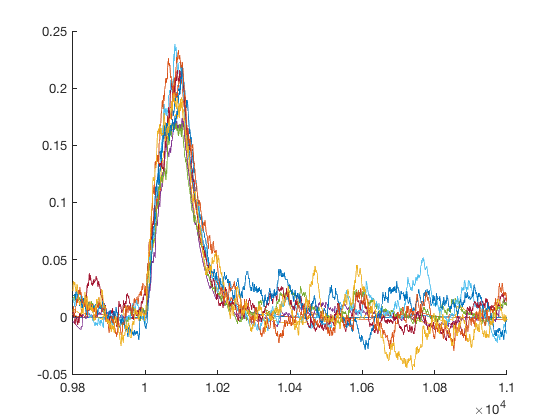

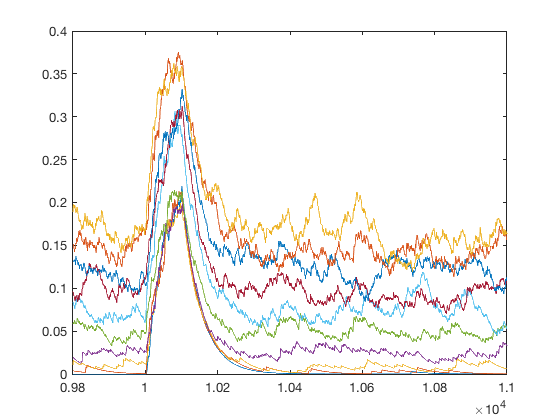

In [8]:
I_exc_gp = 10:10:100;
gAvg = [];
for i = 1:length(I_exc_gp)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_excitationInit('I_exc_gp',I_exc_gp(i),'prob_syn_gp2snr',0.1); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp
dt=0.0001; % 0.1ms integration steps
g=[];
    parfor l =1:10
        [~,~,g_snr] = BGdelayline_excitation('stimCellsPer',10,'I_exc_snr',60,'I_exc_gp',I_exc_gp(i),...
            'prob_syn_gp2snr',0.1,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        g = [g;g_snr];
    end
gAvg = [gAvg; mean(g,1)];
end
figure
plot(gAvg')
xlim([0.98*10^4 1.1*10^4])


% Baseline subtraction to see shape of g(t)
b=mean(gAvg(:,1:10000),2);

figure;
hold on
for figloop = 1:size(gAvg,1)
    plot(gAvg(figloop,:)-b(figloop));
end
xlim([0.98*10^4 1.1*10^4])

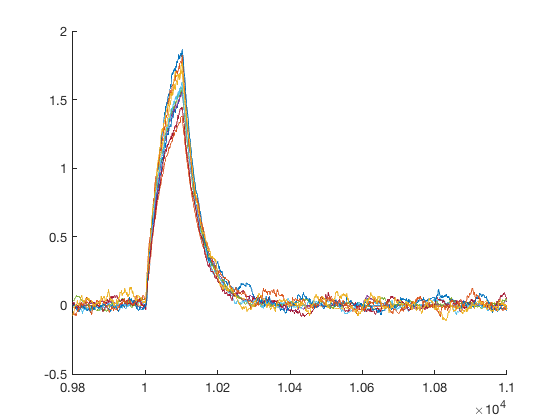

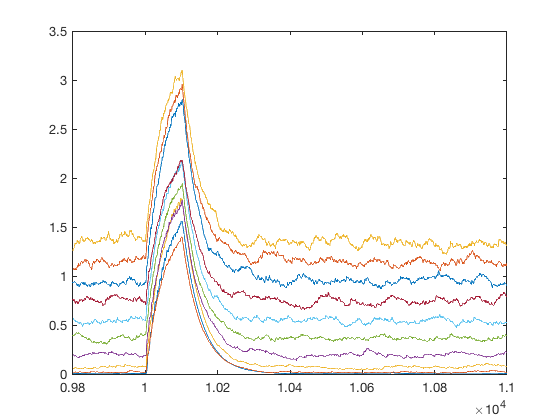

In [7]:
I_exc_gp = 10:10:100;
gAvg = [];
for i = 1:length(I_exc_gp)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_excitationInit('I_exc_gp',I_exc_gp(i),'prob_syn_gp2snr',0.8); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp
dt=0.0001; % 0.1ms integration steps
g=[];
    parfor l =1:10
        [~,~,g_snr] = BGdelayline_excitation('stimCellsPer',10,'I_exc_snr',60,'I_exc_gp',I_exc_gp(i),...
            'prob_syn_gp2snr',0.8,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        g = [g;g_snr];
    end
gAvg = [gAvg; mean(g,1)];
end
figure
plot(gAvg')
xlim([0.98*10^4 1.1*10^4])

% Baseline subtraction to see shape of g(t)
b=mean(gAvg(:,1:10000),2);

figure;
hold on
for figloop = 1:size(gAvg,1)
    plot(gAvg(figloop,:)-b(figloop));
end
xlim([0.98*10^4 1.1*10^4])

Increasing GPe firing rate increases baseline g(t), without changing kinetics or total peak amplitude. I predict that increasing probabiity of synaptic release has the same effect.

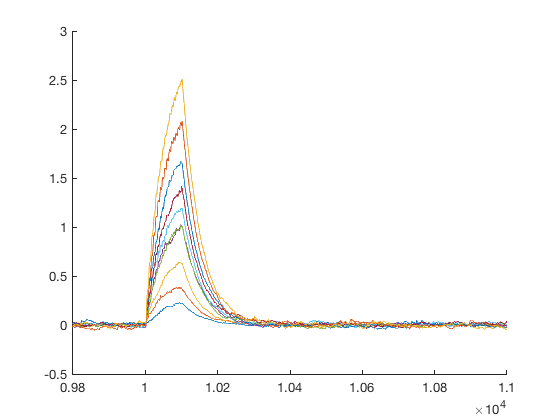

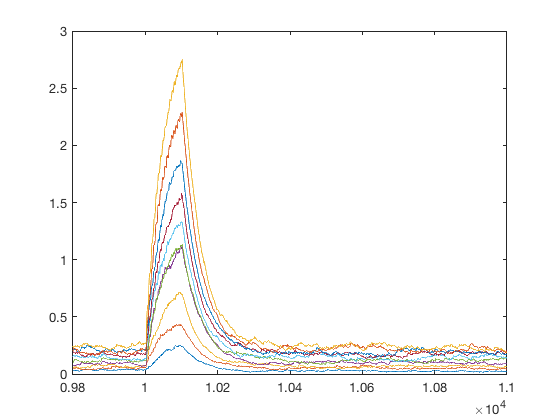

In [9]:
prob = 0.1:0.1:1;
gAvg = [];
for i = 1:length(prob)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_excitationInit('I_exc_gp',40,'prob_syn_gp2snr',prob(i)); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp
dt=0.0001; % 0.1ms integration steps
g=[];
    parfor l =1:10
        [~,~,g_snr] = BGdelayline_excitation('stimCellsPer',10,'I_exc_snr',60,'I_exc_gp',40,...
            'prob_syn_gp2snr',prob(i),'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        g = [g;g_snr];
    end
gAvg = [gAvg; mean(g,1)];
end
figure
plot(gAvg')
xlim([0.98*10^4 1.1*10^4])

% Baseline subtraction to see shape of g(t)
b=mean(gAvg(:,1:10000),2);

figure;
hold on
for figloop = 1:size(gAvg,1)
    plot(gAvg(figloop,:)-b(figloop));
end
xlim([0.98*10^4 1.1*10^4])

### How does g(t) vary depending on GPe activation level? What happens to conductance shape near threshold ?

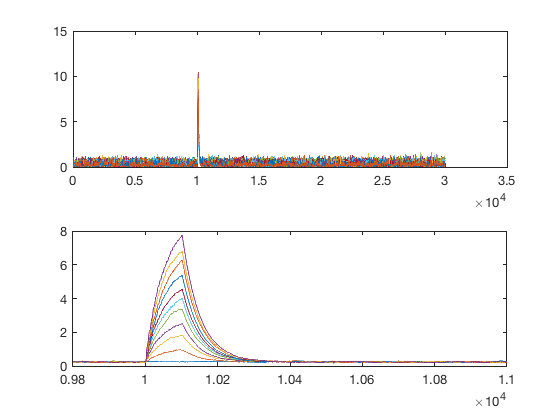

In [22]:
actLevel = 0:10:100;

for i = 1:length(actLevel)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_excitationInit('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

clear spk_snr spk_gp
dt=0.0001; % 0.1ms integration steps
g=[];
    parfor l =1:10
        [~,~,g_snr] = BGdelayline_excitation('stimCellsPer',actLevel(i),'I_exc_snr',60,'I_exc_gp',60,...
            'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        g = [g;g_snr];
    end
hold on
subplot(2,1,1)
plot(g')
subplot(2,1,2)
plot(mean(g,1))
end
subplot(2,1,2)
xlim([0.98*10^4 1.1*10^4])

Increasing activation level increases average conductance peak amplitude and decreases rise and fall kinetics. Baseline is unchanged. Below threshold, conductance is flat whereas right above threshold, the conductance shows response that follow the 1st order linear system dynamics.